<a href="https://colab.research.google.com/github/offshujr04/Azure-Image-Generation/blob/main/Toxic_Comments_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data/Toxicity dataset/train.csv')

In [4]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [5]:
df.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

In [6]:
df['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [7]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [8]:
 df.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [9]:
df[df['severe_toxic'] == 1]

id                                       comment_text  \
6       0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
55      0020e7119b96eeeb  Stupid peace of shit stop deleting my stuff as...   
181     006e87872c8b370c  you are a stupid fuck \n\nand your mother's cu...   
442     01208d2b76624130       Hi \n\nIm a fucking bitch.\n\n50.180.208.181   
579     018663f910e0bfe6  What a motherfucking piece of crap those fuckh...   
...                  ...                                                ...   
159096  f871b05d4caa6f20  You filthy, stinking crow! \n\nI am back! Dirt...   
159099  f885a3e2d779342e  now\n\nyou fucking pathetic moron. \n\ncc:  Ji...   
159281  fb726deec64157bd  LoL!! \n\nyou're GAY!! you will never know how...   
159312  fbf20e312cd4a78d  Walter Mercado \n\nAntonio, quite frankly, you...   
159400  fd052883fa6a8697  Shalom \n\nSemite, get the fuck out of here. I...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
6           1             1        1       0       1              0  
55          1             1        1       0       1              0  
181         1             1        1       0       1              0  
442         1             1        1       0       1              0  
579         1             1        1       0       1              0  
...       ...           ...      ...     ...     ...            ...  
159096      1             1        1       0       1              0  
159099      1             1        1       0       1              0  
159281      1             1        1       0       1              1  
159312      1             1        1       0       1              0  
159400      1             1        1       1       1              1  

[1595 rows x 8 columns]

In [10]:
interested_columns = ['toxic','severe_toxic','obscene','threat',	'insult','identity_hate']

In [11]:
one_counts = df[interested_columns].eq(1).sum()

In [12]:
one_counts

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

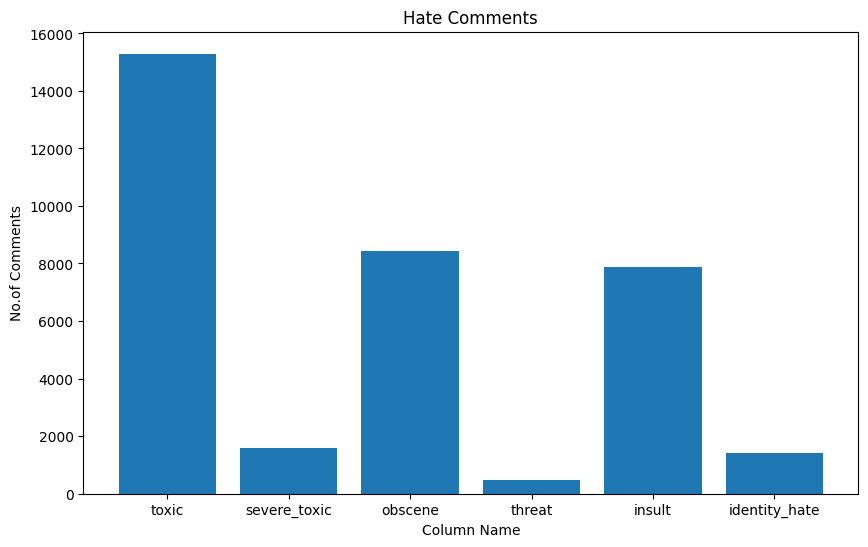

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(one_counts.index, one_counts.values)
plt.xlabel("Column Name")
plt.ylabel("No.of Comments")
plt.title("Hate Comments")
plt.show()

We can see that the data is not distributed equally. Now we make a correlation matrix to check wheter there is any relation between the six labels

In [14]:
correlation_matrix = df[interested_columns].corr()

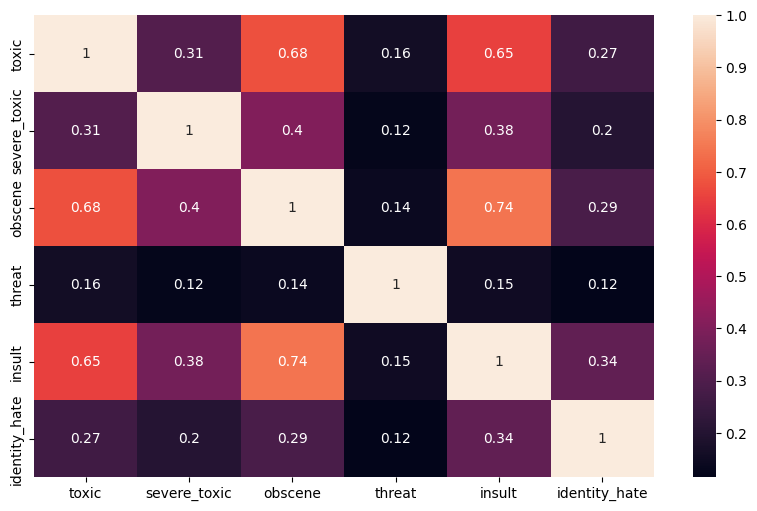

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

High correlation between toxic, insult and obscene columns

Now we find the most common toxic words in the comments

In [16]:
df[df['toxic']==1]['comment_text'].iloc[0]

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [17]:
df[df[interested_columns].sum(axis=1)>0]

id                                       comment_text  \
6       0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
12      0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......   
16      0007e25b2121310b  Bye! \n\nDon't look, come or think of comming ...   
42      001810bf8c45bf5f  You are gay or antisemmitian? \n\nArchangel WH...   
43      00190820581d90ce           FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!   
...                  ...                                                ...   
159494  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
159514  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
159541  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
159546  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
159554  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
6           1             1        1       0       1              0  
12          1             0        0       0       0              0  
16          1             0        0       0       0              0  
42          1             0        1       0       1              1  
43          1             0        1       0       1              0  
...       ...           ...      ...     ...     ...            ...  
159494      1             0        1       0       1              1  
159514      1             0        0       0       1              0  
159541      1             0        1       0       1              0  
159546      1             0        0       0       1              0  
159554      1             0        1       0       1              0  

[16225 rows x 8 columns]

In [18]:
toxic_comments = df[df[interested_columns].sum(axis=1)>0]["comment_text"]
toxic_text = pd.Series(toxic_comments).str.cat(sep=' ')

In [19]:
toxic_comments

6              COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
12        Hey... what is it..\n@ | talk .\nWhat is it......
16        Bye! \n\nDon't look, come or think of comming ...
42        You are gay or antisemmitian? \n\nArchangel WH...
43                 FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!
                                ...                        
159494    "\n\n our previous conversation \n\nyou fuckin...
159514                    YOU ARE A MISCHIEVIOUS PUBIC HAIR
159541    Your absurd edits \n\nYour absurd edits on gre...
159546    "\n\nHey listen don't you ever!!!! Delete my e...
159554    and i'm going to keep posting the stuff u dele...
Name: comment_text, Length: 16225, dtype: object

In [20]:
toxic_text

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings... Bye! \n\nDon\'t look, come or think of comming back! Tosser. You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won\'t appreciate if any more nazi s

In [21]:
from wordcloud import WordCloud

In [22]:
toxic_wordcloud = WordCloud(width=800, height=400, background_color='black',max_words=200).generate(toxic_text)

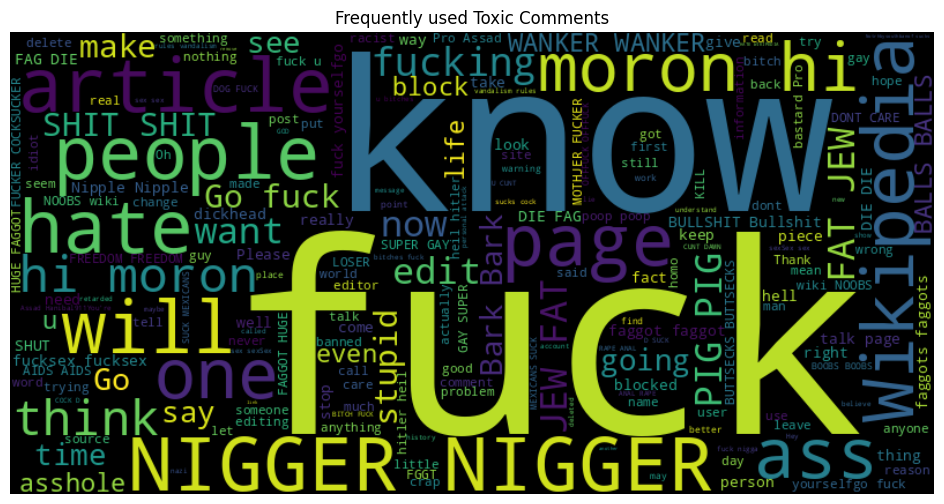

In [23]:
plt.figure(figsize=(15,6))
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequently used Toxic Comments')
plt.show()

In [24]:
top_words = []

In [25]:
for i in range(6):
  toxic_comments_i = df.loc[df[interested_columns[i]]==1,:]["comment_text"]
  toxic_text_i = pd.Series(toxic_comments_i).str.cat(sep=' ')
  toxic_wordcloud_i = WordCloud(width=800, height=400, background_color='black',max_words=200).generate(toxic_text_i)
  top_words.append(toxic_wordcloud_i.words_)

In [26]:
top_words

[{'fuck': 1.0,
  'know': 0.541055341055341,
  'NIGGER NIGGER': 0.5186615186615187,
  'article': 0.4646074646074646,
  'hate': 0.46332046332046334,
  'people': 0.44736164736164735,
  'will': 0.44272844272844275,
  'Wikipedia': 0.4195624195624196,
  'page': 0.4092664092664093,
  'ass': 0.40592020592020595,
  'moron hi': 0.37966537966537967,
  'hi moron': 0.3788931788931789,
  'one': 0.3703989703989704,
  'fucking': 0.3564993564993565,
  'think': 0.331016731016731,
  'PIG PIG': 0.32149292149292147,
  'JEW FAT': 0.3176319176319176,
  'FAT JEW': 0.31557271557271555,
  'want': 0.30296010296010295,
  'edit': 0.3014157014157014,
  'SHIT SHIT': 0.2947232947232947,
  'Go fuck': 0.29034749034749036,
  'now': 0.2805662805662806,
  'stupid': 0.27953667953667954,
  'make': 0.2574002574002574,
  'Bark Bark': 0.2571428571428571,
  'Go': 0.251994851994852,
  'WANKER WANKER': 0.2478764478764479,
  'say': 0.23732303732303733,
  'asshole': 0.23294723294723294,
  'going': 0.23268983268983268,
  'time': 0.2

In [27]:
print(*list(top_words[0].keys())[:10])

fuck know NIGGER NIGGER article hate people will Wikipedia page ass


# Data Preprocessing

> Cleaning data

> Balancing data

> Tokeniozation,Word embedding ...





In [28]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
stop_words = stopwords.words('english')

In [30]:
import re

In [31]:
def stopwords_removal(text):
  text = text.lower().strip()
  text = re.sub(r"[^a-zA-Z0-9]", " ", text)
  words = word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return ' '.join(filtered_words)

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
example = 'This is an example sentence with some stopwords.I want to kill 10 people .ohhhhhh my gawd!!!!! Shubby u crazy !!!?!?@!#?!@?#!@#.Anyways so they were running from me yesterday while I was trying to chew them bite by byte hahahaha!!!!. '
example_2 = stopwords_removal(example)
stopwords_removal(example)

'example sentence stopwords want kill 10 people ohhhhhh gawd shubby u crazy anyways running yesterday trying chew bite byte hahahaha'

In [34]:
  df['clean_text'] = df['comment_text'].apply(stopwords_removal)

In [35]:
df['clean_text'][0]

'explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since retired 89 205 38 27'

In [36]:
df

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  \
0           0             0        0       0       0              0   
1           0             0        0       0       0              0   
2           0             0        0       0       0              0   
3           0             0        0       0       0              0   
4           0             0        0       0       0              0   
...       ...           ...      ...     ...     ...            ...   
159566      0             0        0       0       0              0   
159567      0             0        0       0       0              0   
159568      0             0        0       0       0              0   
159569      0             0        0       0       0              0   
159570      0             0        0       0       0              0   

                                               clean_text  
0       explanation edits made username hardcore metal...  
1       aww matches background colour seemingly stuck ...  
2       hey man really trying edit war guy constantly ...  
3       make real suggestions improvement wondered sec...  
4                           sir hero chance remember page  
...                                                   ...  
159566  second time asking view completely contradicts...  
159567  ashamed horrible thing put talk page 128 61 19 93  
159568  spitzer umm theres actual article prostitution...  
159569  looks like actually put speedy first version d...  
159570  really think understand came idea bad right aw...  

[159571 rows x 9 columns]

Lemmenization to reduce words to there base form

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def lemme(text):
  lemmatizer = WordNetLemmatizer()
  lemmas = [lemmatizer.lemmatize(word) for word in text.split()]
  lemmatized_text = ' '.join(lemmas)
  return lemmatized_text

In [ ]:
lemme(example_2)

'example sentence stopwords want kill 10 people ohhhhhh gawd shubby u crazy anyways running yesterday trying chew bite byte hahahaha'

> Balancing data

In [ ]:
x = df['clean_text']


In [ ]:
x

0         explanation edits made username hardcore metal...
1         aww matches background colour seemingly stuck ...
2         hey man really trying edit war guy constantly ...
3         make real suggestions improvement wondered sec...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567    ashamed horrible thing put talk page 128 61 19 93
159568    spitzer umm theres actual article prostitution...
159569    looks like actually put speedy first version d...
159570    really think understand came idea bad right aw...
Name: clean_text, Length: 159571, dtype: object

In [ ]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'clean_text'],
      dtype='object')

In [ ]:
y = df.drop(columns=['id', 'comment_text', 'clean_text'])

In [ ]:
y

toxic  severe_toxic  obscene  threat  insult  identity_hate
0           0             0        0       0       0              0
1           0             0        0       0       0              0
2           0             0        0       0       0              0
3           0             0        0       0       0              0
4           0             0        0       0       0              0
...       ...           ...      ...     ...     ...            ...
159566      0             0        0       0       0              0
159567      0             0        0       0       0              0
159568      0             0        0       0       0              0
159569      0             0        0       0       0              0
159570      0             0        0       0       0              0

[159571 rows x 6 columns]

In [ ]:
y.eq(1).sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

We will balance the dataset using back translation

In [ ]:
pip install nlpaug


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 6.7 MB/s eta 0:00:00


In [ ]:
text = 'Hi my name is shubhs. I have been living in UAEA for 10+ years. I think i am a faliure and burden to everyone.'

In [ ]:
import nlpaug.augmenter.word as naw


In [ ]:
pip install sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 10.1 MB/s eta 0:00:00


In [ ]:
back_translation_aug = naw.BackTranslationAug(
    from_model_name = 'facebook/wmt19-en-de',
    to_model_name = 'facebook/wmt19-de-en'
)
back_translation_aug.augment(text)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-en-de and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-de-en and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json:   0%|          | 0.00/849k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/315k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json:   0%|          | 0.00/849k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/315k [00:00<?, ?B/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


['Hello, my name is Shubhs. I have been living in the United Arab Emirates for more than 10 years. I believe I am a burden and burden for everyone.']

In [ ]:
eg = df[df['toxic']==1]['comment_text'].iloc[0]
eg

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [ ]:
back_translation_aug.augment(eg)

['COCKSUCKER BEFORE YOUR PISSING ON MY WORK']

In [ ]:
y.eq(1).sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

We will increase the data through text augmentation for the following labels severe_toxic ,threat and identity_hate

In [ ]:
minority_labels = ['severe_toxic','threat','identity_hate']

In [ ]:
x.shape

(159571,)

In [ ]:
x = df[['clean_text','comment_text']].to_numpy()

In [ ]:
x = x.reshape((len(df), -1))
x.shape

(159571, 2)

In [ ]:
x = tf.squeeze(x).numpy()
y = tf.squeeze(y).numpy()

In [ ]:
x

array([[b'explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since retired 89 205 38 27',
        b"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"],
       [b'aww matches background colour seemingly stuck thanks talk 21 51 january 11 2016 utc',
        b"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"],
       [b'hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info',
        b"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead

In [ ]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'clean_text'],
      dtype='object')

In [ ]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']

In [ ]:
y_train_df = pd.DataFrame(y,columns=labels)

In [ ]:
indexes = list(y_train_df[(y_train_df['threat']==1) | (y_train_df['identity_hate']==1)].index)

In [ ]:
X_train_to_aug = x[indexes,1]

In [ ]:
X_train_to_aug

array([b"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!",
       b'Hi! I am back again!\nLast warning!\nStop undoing my edits or die!',
       b'A pair of jew-hating weiner nazi schmucks.', ...,
       b"Shalom \n\nSemite, get the fuck out of here. I will kill you, you son of a bitch if you don't leave wikipedia. If you tell anyone I said this to you, I will rape your jew family. C

In [ ]:
X_train_aug = []
y_train_indexes = []

In [ ]:
back_translation_aug = naw.BackTranslationAug(
    from_model_name = 'facebook/wmt19-en-de',
    to_model_name = 'facebook/wmt19-de-en'
)
back_translation_aug.augment(text)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


['Hello, my name is Shubhs. I have been living in the United Arab Emirates for more than 10 years. I believe I am a burden and burden for everyone.']

In [ ]:
back_translation_aug = naw.BackTranslationAug(
    from_model_name = 'facebook/wmt19-en-de',
    to_model_name = 'facebook/wmt19-de-en'
)
back_translation_aug.augment(text)

def text_augmentation(text, labels):

  tokens = word_tokenize(text.lower())  # Lowercase text for consistency


  back_translation_aug.augment(text)
  augmented_text = " ".join(augmented_tokens)

  return augmented_text, labels

augmented_df = df2.copy()
augmented_df['comment_text'] = df2['comment_text'].apply(lambda text: text_augmentation(text, df2.loc[text.index, ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].tolist())[0])

print(augmented_df)

In [ ]:
df2 = df[['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]

In [ ]:
df2

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
0           0             0        0       0       0              0  
1           0             0        0       0       0              0  
2           0             0        0       0       0              0  
3           0             0        0       0       0              0  
4           0             0        0       0       0              0  
...       ...           ...      ...     ...     ...            ...  
159566      0             0        0       0       0              0  
159567      0             0        0       0       0              0  
159568      0             0        0       0       0              0  
159569      0             0        0       0       0              0  
159570      0             0        0       0       0              0  

[159571 rows x 8 columns]

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize

def text_augmentation(text, labels):
  """
  Performs text augmentation on a text instance with multi-labels.

  Args:
      text: The original text string to be augmented.
      labels: List of labels associated with the text (multi-label).

  Returns:
      augmented_text: The augmented text string.
      augmented_labels: The original labels (unchanged in this case).
  """

  tokens = word_tokenize(text.lower())  # Lowercase and tokenize text

  # Create a BackTranslationAug instance with your preferred languages
  back_translation_aug = naw.BackTranslationAug(
      from_model_name='facebook/wmt19-en-de',
      to_model_name='facebook/wmt19-de-en'
  )
  augmented_text = back_translation_aug.augment(text)  # Apply augmentation to the text

  return augmented_text, labels


filtered_df2 = df2[(df2['threat'] == 1) | (df2['identity_hate'] == 1)]

# Select desired columns from filtered_df2
desired_columns = ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene','threat','insult','identity_hate']
augmented_df = filtered_df2[desired_columns].copy()
augmented_df['comment_text'] = filtered_df2.apply(lambda row: text_augmentation(row['comment_text'], row[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].tolist())[0], axis=1)

print(augmented_df)

# Example with first ten in df2
#df2_head = df2.head(10)
#augmented_df = df2_head.copy()
#augmented_df['comment_text'] = df2_head.apply(lambda row: text_augmentation(row['comment_text'], row[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].tolist())[0], axis=1)

#print(augmented_df)  # Display the DataFrame with augmented comments


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os

                      id                                       comment_text  \
42      001810bf8c45bf5f  [Are you gay or anti-Semitic? Archangel White ...   
79      003217c3eb469ba9  [Hello! I am back! Last warning! Stop reversin...   
105     00472b8e2d38d1ea       [A pair of Jew-hating Weiner Nazi trinkets.]   
176     006b94add72ed61c  [I think your a Fagget gets an oife and burns ...   
218     008e0818dde894fb  [I find it hard that others have said that.. s...   
...                  ...                                                ...   
159281  fb726deec64157bd  [LoL!! you are gay!! you will never know how g...   
159336  fc3efa2f6f025f6d  [Oh, fuck off: The Pansy Jew would just whine ...   
159400  fd052883fa6a8697  [I'm going to kill you, son of a whore, if you...   
159449  fdce660ddcd6d7ca                        [I think he's a gay man!!!]   
159494  fef4cf7ba0012866  [My life is shit. My mom always screams at me ...   

        toxic  severe_toxic  obscene  threat  insul

**Using CLeaned data preprocessing**

In [38]:
x = df['clean_text']
y = df.drop(columns=['id', 'comment_text', 'clean_text'])

In [39]:
vocab_size = 10000

In [41]:
avg_words = x.apply(lambda text: len(text.split())).mean()

# Print the average number of words
print("Average number of words in cleaned text:", avg_words)

Average number of words in cleaned text: 35.840422131840995


In [43]:
from tensorflow.keras.layers import TextVectorization

In [44]:
vectorizer = TextVectorization(max_tokens=vocab_size,
                               output_sequence_length=100,
                               output_mode='int')

In [45]:
vectorizer.adapt(x.values)

In [46]:
vectorized_text = vectorizer(x.values)

In [48]:
vectorized_text

<tf.Tensor: shape=(159571, 100), dtype=int64, numpy=
array([[ 551,   47,   49, ...,    0,    0,    0],
       [   1, 2482,  428, ...,    0,    0,    0],
       [ 289,  298,   53, ...,    0,    0,    0],
       ...,
       [   1, 7143, 5024, ...,    0,    0,    0],
       [ 443,    9,  113, ...,    0,    0,    0],
       [  53,   12,  149, ...,    0,    0,    0]])>

Building a data piupeline using tensorflow

In [49]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(20000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [50]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [55]:
print(len(train))
print(len(val))
print(len(test))

6981
1994
997


Creating a model to pass the cleaned text

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [52]:
embedding_dim = 16

In [53]:
model = Sequential()

In [ ]:
model.add(Embedding(vocab_size+1, 32))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences